In [8]:
import pandas as pd

data = pd.read_csv('data/adult.csv')
#data.head()
data.columns.tolist()

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capitalgain',
 'capitalloss',
 'hoursperweek',
 'native-country',
 'class']

List all possible values for each column and ensure visually all the possible values it has

In [9]:
print(f'Number of instances: {len(data)}')
print(f'Attribute names: {data.columns.to_list()}')
print(f'Number of missing attribute values: {data.isnull().sum().sum()}')
series = data.isnull().sum()
print(f'List of attribute names with at least one missing value {series[series>0].keys().to_list()}')
print(f"Percentage of instances corresponding to individuals whose education level is Bachelors or Masters: {(len(data[(data['education'] == 'Masters') | (data['education'] == 'Bachelors')]) / len(data) * 100)}%")

Number of instances: 48842
Attribute names: ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native-country', 'class']
Number of missing attribute values: 6465
List of attribute names with at least one missing value ['workclass', 'occupation', 'native-country']
Percentage of instances corresponding to individuals whose education level is Bachelors or Masters: 21.870521272675155%


In [10]:
encoded_data = pd.get_dummies(data.dropna())
encoded_data

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,class_<=50K,class_>50K
0,2,77516,13,1,0,2,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,3,83311,13,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,2,215646,9,0,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
3,3,234721,7,0,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
4,1,338409,13,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,1,245211,13,0,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48837,2,215419,13,0,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48839,2,374983,13,0,0,3,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
48840,2,83891,13,2,0,2,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [11]:
x = encoded_data.loc[:, (encoded_data.columns != 'class_<=50K') & (encoded_data.columns != 'class_>50K')]
y = encoded_data.loc[:, (encoded_data.columns == 'class_<=50K')]

In [12]:
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn import metrics

def compute_metrics(model, X_test, y_test, X_train, y_train):
    y_pred = model.predict(X_test)
    score = 0
    for output in zip(y_pred, y_test):
        score = (score + 1) if output[0] == output[1] else score
    score = score / len(y_test)
    print(f'Score: {score}')

    print(f'Training score: {model.score(X_train, y_train)}')
    print(f'Test score: {model.score(X_test, y_test)}')
    print(f'Accuracy: {metrics.accuracy_score(y_test, y_pred)}')
    print(f'Precision per class: {metrics.precision_score(y_test, y_pred, average = None)}')
    print(f'Recall per class: {metrics.recall_score(y_test, y_pred, average = None)}')
    print(f'F1-score per class: {metrics.f1_score(y_test, y_pred, average = None)}')

    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
    disp.plot()
    plt.show()

Score: 0.0
Training score: 0.9995282462554547
Test score: 0.8008137272244826
Accuracy: 0.8008137272244826
Precision per class: [0.58552863 0.87327107]
Recall per class: [0.60861628 0.86226217]
F1-score per class: [0.59684927 0.8677317 ]


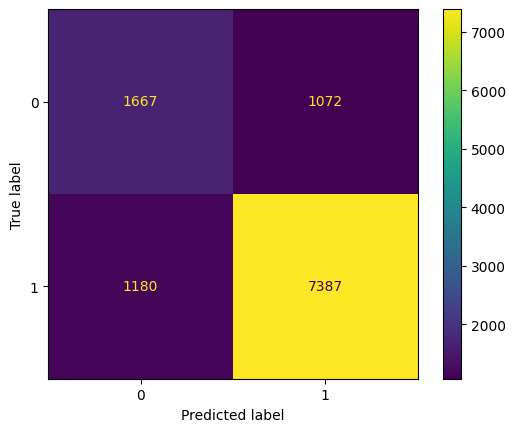

In [13]:
from sklearn.model_selection import train_test_split
from sklearn import tree

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = 0)

decision_tree = tree.DecisionTreeClassifier(random_state = 0)

decision_tree.fit(X_train, y_train)
compute_metrics(decision_tree, X_test, y_test, X_train, y_train)

In [22]:
pd.Series(decision_tree.predict(X_train))

0        1
1        1
2        1
3        1
4        1
        ..
33911    1
33912    0
33913    0
33914    1
33915    1
Length: 33916, dtype: uint8

In [18]:
X_train

,age,fnlwgt,education-num,capitalgain,capitalloss,hoursperweek,workclass_Federal-gov,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
39332,2,46091,13,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1173,0,411862,11,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
19377,1,196690,9,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
14697,0,237386,10,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
46567,2,248476,9,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32823,1,100293,10,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
22924,2,188069,11,0,0,3,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
46005,4,290670,13,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
47040,4,70857,9,0,0,2,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
